# Home Assignment No. 1
## v1.0
To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* You have to write **CODE** directly inside specified places marked by comments: **BEGIN/END Solution**. Do not create new cells.

* In some problems you are asked to provide a short discussion of the results. For that find the specific place marked via **Your text answer: \<write your answer\>**.

* For every separate problem or subproblem (if specified) you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task.

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest fixing random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include necessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

To begin with, let's import the essential (for this assignment) libraries.

In [1]:
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.datasets import make_moons, make_circles

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Task 1. Numpy Problem 1 (1 point)

Write a function, which takes a matrix `arr` and centers each of its columns
by the mean within that column. Check [this](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html)
out for documentation.

In [2]:
def center(arr):
    """Center each column of a matrix by the mean value in that column.

    Parameters
    ----------
    arr : array, shape = (n_rows, n_cols)
        The matrix, the columns of which to center.

    Returns
    ----------
    out : array, shape = (n_rows, n_cols)
        The final column-centered matrix.
    """
    assert arr.ndim == 2
    n_rows, n_cols = arr.shape

    ### BEGIN Solution (do not delete this comment)
    
    out = arr - np.resize(arr.mean(axis=0), (n_rows,n_cols))
    
    ### END Solution (do not delete this comment)

    return out

## Task 2. Numpy Problem 2 (1 point)

Plot the **Hypotrochoid** given by the following equation:
$$\begin{cases}
x(t)=(R - r) \cdot \cos(t) + d \cdot \cos\bigg(\frac{R - r}{r}\cdot t\bigg)\\
y(t)=(R - r) \cdot \sin(t) - d \cdot \sin\bigg(\frac{R - r}{r}\cdot t\bigg)
\end{cases}, 0\leq t\leq 2\pi\cdot \frac{LCM(r, R)}{R};$$
(LCM - Least Common Multiple)
with all possible values of $(R,r,d)$ if $R\in\{4,8\}$, $r\in\{1,2\}$, $d\in\{2,4\}$.

Make sure that each plot has a different color.

To compute LCM you can use `math.gcd` and the relationship between LCM and GCD.

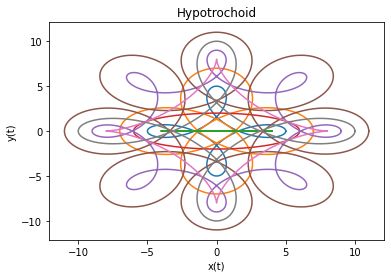

In [3]:
### BEGIN Solution (do not delete this comment)

import math 

R_list = [4,8] 
r_list = [1,2]
d_list = [2,4]

for _, R in enumerate(R_list):
    for _, r in enumerate(r_list):
        for _, d in enumerate(d_list):
            
            LCM = abs(R*r)/ math.gcd(R,r)

            t = np.linspace(0, 2*np.pi * LCM / R , 1000)
        
            x = (R - r) * np.cos(t) + d * np.cos((R-r) * t / r )
            y = (R - r) * np.sin(t) - d * np.sin((R-r) * t / r )

            plt.title('Hypotrochoid')
            plt.xlabel('x(t)')
            plt.ylabel('y(t)')
            plt.plot(x,y)

### END Solution (do not delete this comment)

## Task 3. Matplotlib (1 points)

Plot the level sets of the $l^p$ norm (actually, this is not a norm for $p<1$)
\begin{equation}
    \|z\|_p = \biggl(\sum_i \lvert x_i\rvert^p\biggr)^\tfrac1{p}
        \,,
\end{equation}
and make the contour of the unit ball in $l^p$ norm stand out. Draw plots
for $p \in \{0, \tfrac1{25}, \tfrac12, 1, 1.5, 2, 7, \infty\}$.

Study plotting examples on [this](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html#matplotlib.pyplot.contourf) and [this](http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html) pages (**especially the last one**) and have a look at these functions: *np.meshgrid*, *np.linspace* in numpy's documentation. We suggest to use `np.linalg.norm`.

Try to produce a plot that **looks like the one below**:

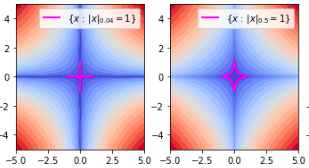

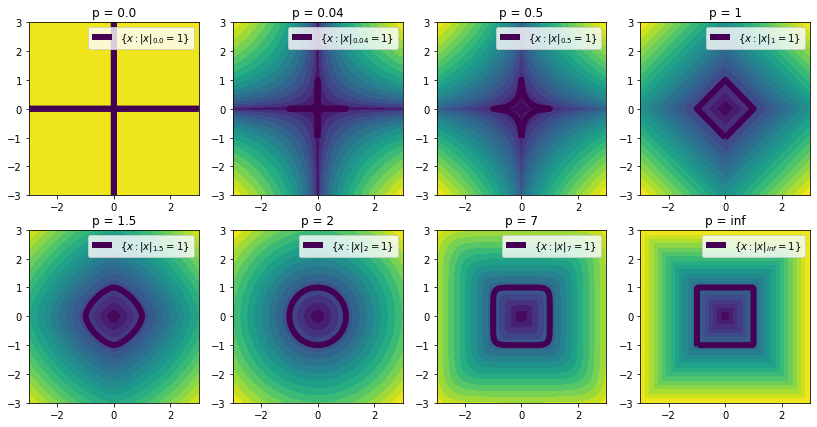

In [4]:
p_values = [0., 0.04, 0.5, 1, 1.5, 2, 7, np.inf]
xx, yy = np.meshgrid(np.linspace(-3, 3, num=101),
                     np.linspace(-3, 3, num=101))

fig, axes = plt.subplots(ncols=(len(p_values) + 1)// 2,
                         nrows=2, figsize=(14, 7))

for p, ax in zip(p_values, axes.flat):
    
    ### BEGIN Solution (do not delete this comment)
    
    zz = np.empty_like(xx)
    for index, val in np.ndenumerate(xx):

        a = np.array([ xx[index[0],index[1]] , yy[index[0],index[1]] ])
        zz[index[0],index[1]] = np.linalg.norm(a, ord= p)

    ax.contourf(xx,yy, zz, levels = 19)  
    a = ax.contour(xx,yy,zz, levels = [1], linewidths = 6)
    ax.set_title("p = "+ str(p))
    ax.legend([a.collections[0]], ['{'+r'$ x: |x|_{{{}}} = 1 $'.format(p)+'}'])
    
    ### END Solution (do not delete this comment)

plt.show()

## Task 4. Decision Rules and Feature Engineering (1+1 points)

In this task, your goal is to visualize the decision rules of several classifiers applied to an artificial $2$-dimensional dataset inspired by the dataset that can be created using the built-in `sklearn.datasets` method called `make_moons`. The main difference is a sun added outside the moons. In the cell below we generate the dataset.

In [5]:
def make_sunny_moons(n_sun=50, n_moons=100, noise=0.0, sun_radius=1.9, theta=None):
    np.random.seed(0xBEEFBAD)
    X_moons, y_moons = make_moons(n_samples=n_moons, noise=noise)
    if not n_sun:
        return X_moons, y_moons
    
    angles = np.arange(0, 2 * np.pi, 2 * np.pi / n_sun)
    X_sun = sun_radius * np.column_stack([np.cos(angles), np.sin(angles)]) + np.array([0.5, 0.25])
    X_sun += np.random.normal(scale=noise, size=X_sun.shape)
    y_sun = 2 * np.ones(n_sun)
    
    X = np.vstack([X_moons, X_sun])
    y = np.concatenate([y_moons, y_sun]).astype(int)
    X -= X.mean(axis=0)
    
    if theta is None:
        theta = np.pi / 4
    c, s = np.cos(theta), np.sin(theta)
    R = np.array(((c,-s), (s, c)))
    X = X @ R
    
    return X, y

X, y = make_sunny_moons(n_sun=150, n_moons=300, noise=0.15)

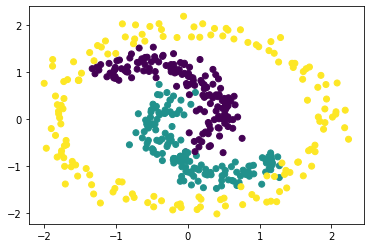

In [6]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.show()

### Subproblem 4.1. Decision Rule Plotting (1 point)

The goal of the subproblem is to fit the following classifiers on features `X` to target `y`:
* Decision Tree (single!) with small depth ($\leq 4$);
* Random Forest with a small number of trees ($\leq 25$) of small depth ($\leq 4$);
* Logistic Regression;
* Support Vector Machine with RBF kernel;
* Gaussian Naive Bayes;
* k-Nearest Neighbor Classifier with a small number of neighbors (e.g. $3$);

For all the fitted classifiers you have to plot the decision regions (the example is shown below the cell). Each plot must have **Title** which contains the name of the classifier and its accuracy (only **two** decimal places) on the data.

You can write the plotting code on your own, but we highly recommend just to use `mlxtend` library (`pip install mlxtend` in linux terminal), which has an awesome one-line decision rule plotting function (you are to [google](http://google.com) it).

![title](data/example.png)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


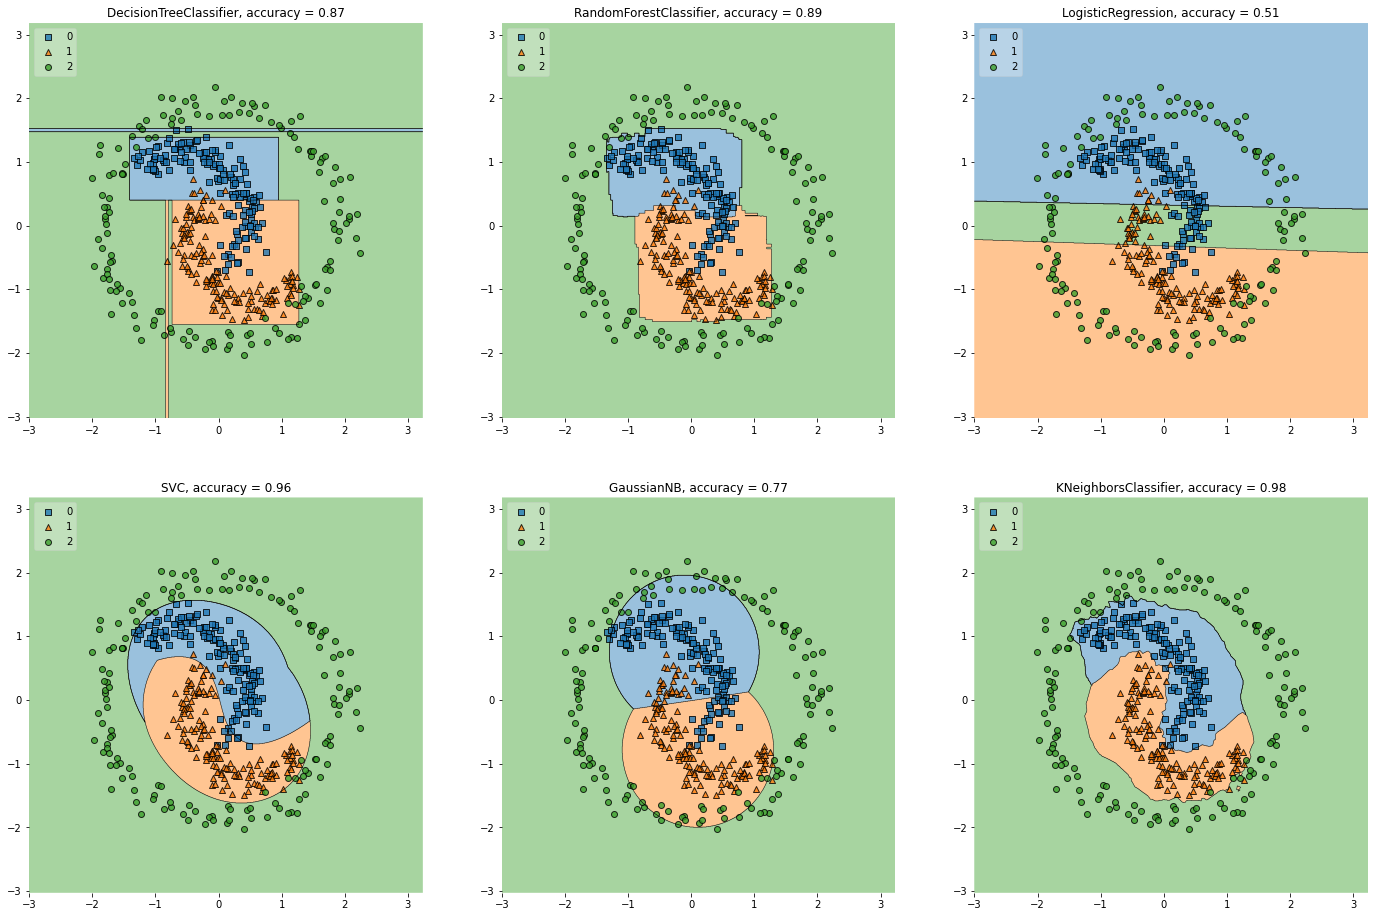

In [7]:
### BEGIN Solution (do not delete this comment)

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.gridspec as gridspec
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from mlxtend.plotting import plot_decision_regions

import warnings
warnings.filterwarnings("ignore")

random_seed = 0xBEEFBAD

classifiers = [
               DecisionTreeClassifier(random_state = random_seed, max_depth = 4),
               RandomForestClassifier(random_state = random_seed, max_depth = 4, n_estimators = 25),
               LogisticRegression(random_state = random_seed),
               svm.SVC(kernel='rbf', random_state = random_seed),
               GaussianNB(),
               KNeighborsClassifier(n_neighbors=3)
]

gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(24, 16))

for id ,clf in enumerate(classifiers):
    clf.fit(X,y)
    accuracy = clf.score(X,y)

    ax = plt.subplot(gs[id // 3, id % 3]);
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2);
    plt.title(type(clf).__name__ + ', accuracy = ' + str(np.round(accuracy,2)));

plt.show()

### END Solution (do not delete this comment)

### Subproblem 4.2. Pipeline: Fitting to Data by Feature Engineering (1 point)
In previous task 4.1 several classifiers obviously failed fitting to data. This happened because the decision rule of the classifier has a restricted form (e.g. linear for linear models), while the data is more complicated.

One may try to change the parameters of the classifier (e.g. increase the number of trees in Forest) in order to improve accuracy, but some models (especially linear) do not have parameters that can change the form of the decision rule.

In this case the **feature engineering** helps: one may try to compute new (e.g. non-linear) features based on the existing pool and fit the classifier in the new features. This may help low-complex classifiers to fit to hard data dependencies.

Your task it to
* Choose **two classifiers** from the previous problem among Decision Tree, Random Forest, Naive Bayes, Logistic Regression;
* By generating of additional features (e.g. polynomial) make them achieve accuracy $>0.95$.
* For each classifier, write 2-3 sentences about why did you choose these features.
* Plot their decision rules in the original feature space.

It is your choice how to generate features. You may create hand-crafted features and add them manually. Nevertheless, we **highly suggest** to get used to and apply the following builtin `sklearn` methods:
* `PolynomialFeatures`, `GaussianRandomProjection` among others - for feature generation
* `StandartScaler`, `MinMaxScaler` among others - for feature scaling
* `Pipeline` - for combining several operations in a row (e.g. feature creation & prediction)

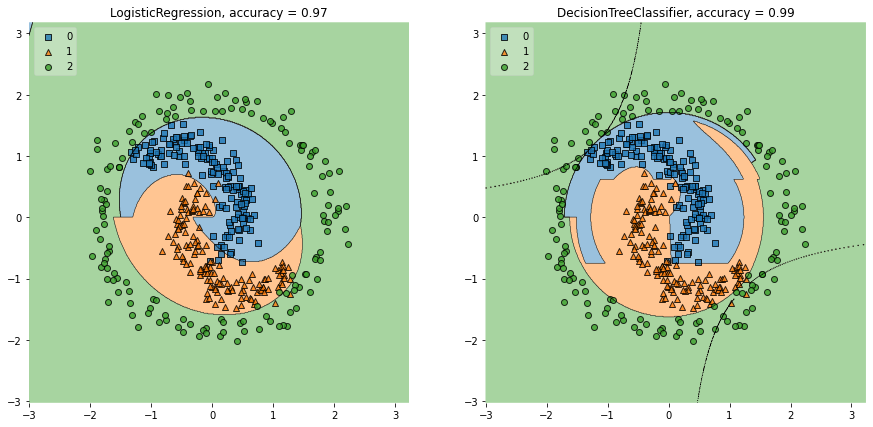

In [8]:
### BEGIN Solution (do not delete this comment)

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import FunctionTransformer


random_seed = 0xBEEFBAD

classifiers = [
               LogisticRegression(random_state = random_seed),
               DecisionTreeClassifier(random_state = random_seed, max_depth = 4)
]

poly_features = PolynomialFeatures(2, interaction_only = True, include_bias = False)
gs = gridspec.GridSpec(1, 2)
fig = plt.figure(figsize=(15, 7))

def add_polarFeatures(data):
    '''add polar fetures: r - radius, phi - angle'''
    x = data[:,0]
    y = data[:,1]
  
    r = (x**2 + y**2)**0.5
    phi = np.arctan2(y,x)
    
    #adding new features to old data
    data = np.hstack((data, r.reshape(-1,1), phi.reshape(-1,1)))

    return data

transformation = FunctionTransformer(add_polarFeatures)

for id, clf in enumerate(classifiers):
    
    pipe = Pipeline([('Features', transformation), ('scaler', StandardScaler()), ('poly', poly_features),  ('clf', clf)])
    
    clf = pipe.fit(X, y)
    accuracy = pipe.score(X, y)
    
    ax = plt.subplot(gs[id // 2, id % 2])
    plt.title(type(clf['clf']).__name__ + ', accuracy = ' + str(np.round(accuracy,2)))
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    
plt.show()  

### END Solution (do not delete this comment)

**Your text answer (do not delete this comment)**:

\<During visual evaluating plots of 'moons' I decided that it would be usefull to add features that describes rounded forms of theese groups. That's why I added polar coordinates: r - radius, and phi - angle to previous data. This approach improved the accuracy for both chosen models. Adding polynomial features of 2-nd degree allowed to make regions smoother and improve the accuracy more than 0.95\>

## Task 5. Model Selection (1+1 points)

You are to test Random Forests and Support Vector Machines on a trivial [Tic Tac Toe Endgame Dataset](https://datahub.io/machine-learning/tic-tac-toe-endgame). Let's load it.

In [9]:
data = pd.read_csv('data/tic-tac-toe.csv')
X, y = data.drop('class', axis=1), data['class'].astype(int)
data.sample(3)

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
857,o,b,x,o,x,x,o,b,b,False
375,o,o,x,x,x,b,x,b,o,True
196,x,o,b,x,o,x,x,b,o,True


The dataset consists of several possible endgame positions of the Tic-Tac-Toe game. The target variable is the victory of `x` player over `o` player (victory or defeat/draw). Since the features are categorical, we simply transform them to real-valued $-1$ for `o`, $1$ for `x` and $0$ for empty cell `b`.

In [10]:
X = X.applymap(lambda v: 1 if v == 'x' else -1 if v == 'o' else 0)
X.sample(4).sort_index()

,TL,TM,TR,ML,MM,MR,BL,BM,BR
183,1,-1,-1,0,1,0,-1,1,1
371,-1,-1,1,1,1,-1,1,1,-1
763,-1,1,1,-1,0,1,-1,0,0
931,0,0,1,-1,-1,-1,1,0,1


We are going to test how machine learning algorithms can classify the final game positions into the ones when `x` player won and all others. Everybody knows that for this problem there is a simple decision rule: `x` wins if there are three `x`'s in a row/column/diagonal. But can our cool machine learning tools catch this trivial dependence? In this problem, the class balance is around $2:1$ so we still use the accuracy metric.

Intuitively, this rule is logical, i.e. one may expect a decision-tree-based algorithm to be the most appropriate for this case. But is that true? In the code below we compare huge Random forest with simple Logistic Regression and SVM with default parameters.

In [11]:
np.random.seed(0xBADBEEF)
test_idx = list(np.random.choice(range(len(X)), 650, replace=False))
train_idx = [i for i in range(len(X)) if i not in test_idx]

Note that we will use only $\frac{1}{3}$ of data to train and $\frac{2}{3}$ to test the model.

In [12]:
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators=400, max_depth=10, random_state=2)
svm = SVC(gamma='auto')
lr = LogisticRegression(solver='lbfgs')
clfs = (rf, svm, lr)

for clf in clfs:
    clf.fit(X.iloc[train_idx], y.iloc[train_idx])
    score = accuracy_score(y.iloc[test_idx], clf.predict(X.iloc[test_idx]))
    name = clf.__class__.__name__
    print(f'{name} scored {round(score, 3)}')

RandomForestClassifier scored 0.932
SVC scored 0.94
LogisticRegression scored 0.972


We see all the models provide reasonable quality. Yet we are not satisfied!

### Subproblem 5.1. Model selection for SVM (1 of 2 points)
Perform **Grid Search** on a train set for optimal hyperparameter for SVM model in order to achieve a 5-fold validation accuracy score on the data not lower than $0.98$. You can code the Grid Search Manually, but we highly encourage you to use the built-in `GridSearchCV` method. **Report** the 5-fold validation accuracy score, test accuracy score using the model refitted with best hyperparameters and also print best hyperparameters. **Explain** the results: does your model overfit?

In [13]:
### BEGIN Solution (do not delete this comment)

from sklearn import svm
from sklearn.model_selection import GridSearchCV

parameters = {
              'kernel':('linear', 'rbf', 'poly'),
              'C': np.linspace(0.1 ,10, 100), #strictly positive
             }

svc = svm.SVC()

grid = GridSearchCV(svc, parameters, cv=5, refit = True )
grid.fit(X.iloc[train_idx], y.iloc[train_idx])

cv_accuracy = grid.score(X.iloc[train_idx], y.iloc[train_idx])
print("CV SVM scores", round(accuracy, 3))

test_accuracy = clf.score(X.iloc[test_idx], y.iloc[test_idx])
print("Test SVM scores", round(test_accuracy, 3))

print('Best parameters:%s'%grid.best_params_)

### END Solution (do not delete this comment)

CV SVM scores 0.989
Test SVM scores 0.972
Best parameters:{'C': 0.2, 'kernel': 'linear'}


**Your text answer (do not delete this comment)**:

\<No, it doesn't overfit. At first, We have high score on validation and on our test datasets. At second, I think that if it had been overfitted, GridSearchCV would have chosen high values of regularizing parameter C to penalize our model stronger. Moreover, overfitted model is a model which tend to adapt to the noise of data, I checked the dataset and found out that it has no noise at all, because all winning combinations correspond to strict rules (only 8 winning combinations). Thats why it's possible to have classifirer with accuracy 1 on train and test dataset in this task\>

### Subproblem 5.2. Feature engineering for Random Forest  (1 of 2 points)
Perform **feature engineering** for Random Forest with given hyperparameters in order to achieve 5-fold mean validation score not lower than $0.96$. **Write** 2-3 sentences to explicitly explain your motivation for provided feature choice. Fit the model on the whole train set and **provide** the test score. 

In [14]:
rf = RandomForestClassifier(n_estimators=400, max_depth=10, random_state=2)

### BEGIN Solution (do not delete this comment)

X_train = X.iloc[train_idx].to_numpy()
y_train = y.iloc[train_idx].to_numpy()

X_test = X.iloc[test_idx].to_numpy()
y_test = y.iloc[test_idx].to_numpy()

def find_winnings(data):
    # function that finds winning combinations using matmul with kernel
    
    # kernel, that has info about all 8 winning combinations
    kernel = np.array([[1,0,0,1,0,0,1,0,0],
                       [0,1,0,0,1,0,0,1,0],
                       [0,0,1,0,0,1,0,0,1],
                       [1,1,1,0,0,0,0,0,0],
                       [0,0,0,1,1,1,0,0,0],
                       [0,0,0,0,0,0,1,1,1],
                       [1,0,0,0,1,0,0,0,1],
                       [0,0,1,0,1,0,1,0,0]])
    
    result = data @ kernel.T
    return result

def maximize_winnings(data):
    # function for maximization the winning feature among other similar combinations

    result = data.max(axis=1).T
    return np.hstack((data, np.reshape(result, (-1,1))))


#objects for pipeline
find_combinations = FunctionTransformer(find_winnings)
maximize = FunctionTransformer(maximize_winnings)

parameters = {}
clf = GridSearchCV(rf, parameters, cv=5)

pipe = Pipeline([('feature_finder', find_combinations), ('maximization', maximize) ,('clf', clf)])

pipe.fit(X_train, y_train)
train_score = pipe.score(X_train, y_train)
test_score = pipe.score(X_test, y_test)

print("Random Forest scored " +str(np.round(train_score,3))+ " on CV for extra features")
print("Random Forest scored " +str(np.round(test_score,3))+ " on Test")

### END Solution (do not delete this comment)

Random Forest scored 1.0 on CV for extra features
Random Forest scored 1.0 on Test


**Your text answer (do not delete this comment)**:

\<To create new features I created special kernel, that contains all 8 winning combinations. During matmul with input vector, kernel finds these combinations as a result I have 8 new features with information about similarity with winning combinations. But using only this approach I didn't reach 1.0 accuracy, because some input vectors (there are 16) are similar to winnings combinations, but not completely. To solve it, I created 9th feature, that has additional information for very similar to winnings combinations .\>

## Task 6. Bagging Ensembles of Regressors (1+1 points)
In this problem, you are to deal with [Concrete Compressive Strength Dataset](https://www.kaggle.com/elikplim/concrete-compressive-strength-data-set). Your goal will be to determine the optimal parameters for two Bagging-Based Forest Ensemble **Regressors** and compare the forests. Let's load the data and split it into test and train parts.

In [15]:
data = pd.read_csv('data/concrete.csv').astype(float)
X = data.drop('concrete_compressive_strength', axis=1)
y = data.concrete_compressive_strength

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

data.sample(3).sort_index()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
775,281.0,0.0,0.0,186.0,0.0,1104.0,774.0,28.0,22.44
834,310.0,143.0,111.0,168.0,22.0,914.0,651.0,28.0,33.69
1019,139.7,163.9,127.7,236.7,5.8,868.6,655.6,28.0,35.23


Please note that both in Task 4 and Task 5 the whole data was the Train Data. In Task 4 the output score (accuracy) was the **train** score (i.e. the score on the train data of the model fitted on the same data). In task 5 the output score was the **validation score**, i.e. the result of validating the model on the train data.

In this problem, we do a step further and split the whole data into the train part (on which we train & validate) and test part (where we compute the final **test** score on the validated model).

In this problem, you are to consider the `RandomForestRegressor` and `ExtraTreesRegressor` models for the prediction of concrete compressive strength under **squared loss function** (mean squared error). Recall that Random Forest was discussed in the lectures. [Extremely Randomized Forest](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.65.7485&rep=rep1&type=pdf) is another bootstrapped forest with a simple tree building algorithm. Basically, each split of each tree node is chosen at random both w.r.t. feature and threshold (while in the random forest the split minimizes impurity).

### Subproblem 6.1. Hyperparameters tuning (1 point)

* For both Forests perform the Grid Search (on the whole train data using 5-fold cross-validation scheme) over most important algorithm's parameters (what are they?) to determine the optimal hyperparameters.
* For the optimal hyperparameters output the 5-fold mean train score, 5-fold mean validation score and the test score (to obtain test score use the model with best hyperparameters refitted on the whole train set).

In [16]:
### BEGIN Solution (do not delete this comment)

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

random_seed = 1

classifiers = [
              RandomForestRegressor(random_state = random_seed, n_jobs = -1),
              ExtraTreesRegressor(random_state = random_seed, n_jobs = -1)
]

parameters  = { 
                #The larger the better, because of averaging the results of each tree.
                #But results go to asymptote, and also the larger the slower clf will work
                'n_estimators': [90, 120],
             
                # The lower the greater reduction of variance but also the greater increase bias
                # Usually it's better to use "None" (use all features)  
                'max_features':[4,6,None],
            
                # Works better with not very low values (avegaing of bad estimators have no gain) 
                # But also not very high values (then trees less similar, and it's better)
                'max_depth' : [50, 70 , 120, None],
                   
}

def get_scores(model, X_train, y_train, X_test, y_test):
    #function for getting train, valid and test scores with variance

    # just a symbol plus-minuss
    plus_minus = u"\u00B1"
    
    #crossvalidation
    res = cross_validate(model, X_train, y_train, return_train_score = True)

    #extracting scores and its variance over folds
    abs = np.round(np.mean(res['train_score']), 1)
    std = np.round(np.std(res['train_score']),1)
    train_score = str(np.abs(abs)) + plus_minus + str(np.abs(std))

    abs = np.round(np.mean(res['test_score']), 1)
    std = np.round(np.std(res['test_score']),1)
    valid_score = str(np.abs(abs)) + plus_minus + str(np.abs(std))

    #test score has no variance, because it was evaluated only on one train set 
    test_score = str(np.abs(np.round(model.score(X_test, y_test), 1)))

    return {'Train':train_score, 'Valid': valid_score, 'Test': test_score}

scores = []

for id, clf in enumerate(classifiers):
    # cv strategy 
    cv = KFold(n_splits= 5, shuffle= True, random_state= random_seed)

    #searching for best parameters.
    grid = GridSearchCV(clf, parameters, cv = cv, return_train_score= True, refit= True, scoring = 'neg_mean_squared_error')
    grid.fit(X_train, y_train)
    
    #printing best parameters
    print(type(grid.estimator).__name__, ': best param:%s'%grid.best_params_)

    scores.append(get_scores(grid, X_train, y_train, X_test, y_test))

# disply table with results
pd.DataFrame(scores, index = ['RandomForestRegressor', 'ExtraTreesRegressor'])

### END Solution (do not delete this comment)

RandomForestRegressor : best param:{'max_depth': 50, 'max_features': 4, 'n_estimators': 120}
ExtraTreesRegressor : best param:{'max_depth': 50, 'max_features': 6, 'n_estimators': 120}


,Train,Valid,Test
RandomForestRegressor,4.9±0.4,28.0±3.0,23.2
ExtraTreesRegressor,1.2±0.5,24.9±3.8,22.1


### Subproblem 6.2. Results explanation (1 point) 

* Compare the obtained scores. Explain, why the scores differ a lot for train and validation/test.
* Which of the algorithms perform better on the training set? Explain why!

**Your text answer (do not delete this comment)**:

\<1) Scores for different parts of dataset are different because we use very long trees, much of them are overfitted. So it means that for train set error will be much lower. I tried  to limit tree's depth by 1, and such weak learners probably weren't overfited and scores were be almost similar.

2)  ExtraTreesRegressor usually perform better on the train set, because it doesn't use bootstrap approach, so it means that all the trees train on the same data, and so they will be overfited on the same data. I checked the scores when both algoritms did/didn't use bootstap, results confirmed my hypotesis.      \>

## Task 7. Multiclass Classification Strategies (1 point)
In this task, you deal with a multiclass classification problem for [Glass Classification Data](https://www.kaggle.com/uciml/glass). Let's load the dataset.

In [17]:
data = pd.read_csv('data/glass.csv')
X, y = data.drop('Type', axis=1), data.Type
data.sample(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
101,1.51730,12.35,2.72,1.63,72.87,0.70,9.23,0.0,0.00,2
166,1.52151,11.03,1.71,1.56,73.44,0.58,11.62,0.0,0.00,5
107,1.53393,12.30,0.00,1.00,70.16,0.12,16.19,0.0,0.24,2


The features of each glass object correspond to the fraction of the particular chemical element in the object. The target variable corresponds to the type of glass (6 classes).

In this problem, you have to empirically compare the time complexity and performance of several multiclass labeling strategies for different algorithms. You must consider the following algorithms:
* Single Decision Tree (depth 7)
* Medium Random Forest (100 trees of depth 3)
* KNearestNeighbors (5 neighbors)
* Logistic Regression

Note that all these algorithms by default support **multiclass labeling**. Nevertheless, we want you to compare this approach with **OneVSRest** and **OneVSOne** approaches applied to these algorithms. More precisely, for every pair (algorithm, approach) you are to perform 5-fold cross-validation on the data. The output in the **table** form must include 5-fold mean validation score and the computation time. Please note that you also have to choose the metric to optimize during CV (e.g. accuracy, balanced accuracy) on your own.

**HINT**: use ```time.perf_counter()``` to measure time.

After that, you are to answer the following questions:
* Which metric did you choose to optimize during cross-validation and why? Explain
* For which algorithms the usage of the OneVSRest/OneVSOne approach provides significantly better performance without a significant increase in computation time?

In [18]:
### BEGIN Solution (do not delete this comment)
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from time import perf_counter
from sklearn import preprocessing

class MultiStrategyClassifier():
    #Class, that fits with multiclass, OvO, OvR approaches 
    def __init__(self, clf):
        self.clf = clf
        self.clf_OvO = OneVsOneClassifier(clf, n_jobs= -1)
        self.clf_OvR = OneVsRestClassifier(clf, n_jobs= -1)
        self.name = str(type(clf).__name__)
        
    def fit_score(self, X_train, y_train):
        self.times = []
        self.scores = []

        #for imbalanced and rare classes it's better then usual kfold
        kf = RepeatedStratifiedKFold(n_splits= 5, n_repeats= 2, random_state = random_seed)

        #training our classifiers
        for id, clf_ in enumerate([self.clf, self.clf_OvO, self.clf_OvR]):
        
            clf = GridSearchCV(estimator= clf_, param_grid={}, scoring = 'balanced_accuracy', n_jobs=-1, cv = kf)

            #fixing time of training
            t = perf_counter()
            clf.fit(X_train, y_train)
            self.times.append(perf_counter() - t)
            #And mean test score
            self.scores.append(clf.cv_results_['mean_test_score'][0])


random_seed = 0

#encoding labels. Some labels was missed in dataset, that's why we need it 
le = preprocessing.LabelEncoder()
y =  le.fit_transform(y)

#splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=random_seed)

classifiers = [
               MultiStrategyClassifier(LogisticRegression(max_iter=10000, penalty='l2', C = 2)),
               MultiStrategyClassifier(RandomForestClassifier(n_estimators= 100,n_jobs=-1 ,max_depth= 3)),
               MultiStrategyClassifier(KNeighborsClassifier(n_neighbors= 5, n_jobs=-1)),
               MultiStrategyClassifier(DecisionTreeClassifier(max_depth= 7))
]

for id, clf in enumerate(classifiers):
    clf.fit_score(X, y)

d = {classifiers[0].name: classifiers[0].scores,
     classifiers[1].name: classifiers[1].scores,
     classifiers[2].name: classifiers[2].scores,
     classifiers[3].name: classifiers[3].scores}

print('Cross Validation Scores')
display(pd.DataFrame(data = d, index=['Multiclass', 'OneVsOne', 'OneVsRest']))

t = {classifiers[0].name: classifiers[0].times,
     classifiers[1].name: classifiers[1].times,
     classifiers[2].name: classifiers[2].times,
     classifiers[3].name: classifiers[3].times}

print('Training Duration (CV=5)')
display(pd.DataFrame(data = t, index=['Multiclass', 'OneVsOne', 'OneVsRest']))

### END Solution (do not delete this comment)

Cross Validation Scores


,LogisticRegression,RandomForestClassifier,KNeighborsClassifier,DecisionTreeClassifier
Multiclass,0.524950,0.576974,0.548194,0.634315
OneVsOne,0.521399,0.681548,0.518929,0.735099
OneVsRest,0.507431,0.636587,0.580665,0.636786


Training Duration (CV=5)


,LogisticRegression,RandomForestClassifier,KNeighborsClassifier,DecisionTreeClassifier
Multiclass,5.516215,2.281419,0.571207,0.054839
OneVsOne,4.887646,35.377246,16.227249,0.784011
OneVsRest,2.772542,11.412981,3.688483,0.608624


**Your text answer (do not delete this comment)**:

\<1) In this task we have imbalanced multiclass classification problem and as relevant metric I choose balanced_accuracy_score, because it's well interpreted. But also for multiclass problems with imbalanced classes micro-F1 score is often used.

2) According the results, none of the algoritms has significant better performance without a significant increate in computation time. For example I noticed that balanced accuracy increased to 0.11 for DecisionTrees using OvO approach, but also time of working increased almost in 14 times!  \>

## Task 8. Boosting, part 1. (1+1 points)


> Boosting Machines (BM) is a family of widely popular and effective methods for classification and regression tasks. The main idea behind BMs is that **combining weak learners**, which perform slightly better than random, can result in **strong learning models**.

> AdaBoost utilizes the greedy training approach: firstly, we train the weak learners (they are later called `base_classifiers`) on the whole dataset and in the next iterations we train the model on the samples, on the which the previous models have performed poorly. This behavior is achieved by reweighting the training samples during each algorithm's step. 

#### The task:

In this exercise you will be asked to implement one of the earlier variants of BMs - **AdaBoost** and compare it to the already existing `sklearn` implementation. The key steps are:

* Complete the `ada_boost_alpha` and `ada_boost_distribution` functions

* Complete the `.fit` method of `Boosting` class

* Complete the `.predict` method of `Boosting` class

The pseudocode for AdaBoost can be found in lectures.

For `ada_boost_distribution` please use another pseudocode, that used for `sklearn` realization:
$$
\begin{align}
&\textbf{for } i \gets 1 \textbf{ to } m \textbf{ do}\\
&\;\;\;\;w_{i,t+1}\gets w_{i,t}\exp(-\alpha_t y_t h_t(\mathbf{x}_i))\\
&C = \sum_{j=1}^m w_{j,t+1}\\
&\textbf{for } i \gets 1 \textbf{ to } m \textbf{ do}\\
&\;\;\;\;\tilde{w}_{i,t+1}\gets \tfrac{1}{C}w_{i,t+1}
\end{align}
$$

##### criteria

the decision boundary of the final implementation should look reasonably identical to the model from `sklearn`, and should achieve accuracy close to `scikit` :

$$
    |\text{your_accuracy} - \text{sklearn_accuracy}| \leq 0.005
\,. $$

In [19]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

In [20]:
### Plot the dataset

X, y = make_moons(n_samples=1000, noise=0.3, random_state=0)

# for convenience convert labels from {0, 1} to {-1, 1}
y[y == 0] = -1

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 30),
                     np.linspace(y_min, y_max, 30))

cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

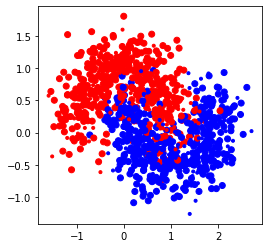

In [22]:
# Plot the training points
plt.figure(figsize=(4, 4))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
plt.scatter(X_test[:, 0], X_test[:, 1], marker='.', c=y_test, cmap=cm_bright)

In [23]:
from sklearn.tree import DecisionTreeClassifier # base classifier

### Subproblem 8.1.1. AdaBoost alphas and distribution (1 point)

Now let us define functions to calculate alphas and distributions for AdaBoost algorithm

In [24]:
def ada_boost_alpha(y, y_pred_t, distribution):
    """
    Function, which calculates the weights of the linear combination of the classifiers.
    
    y_pred_t is a prediction of the t-th base classifier
    """
    ### BEGIN Solution (do not delete this comment)
    
    N = np.sum( distribution * (y*y_pred_t <= 0) )

    alpha = 0.5 * np.log((1-N) / N)
    
    ### END Solution (do not delete this comment)

    return alpha

def ada_boost_distribution(y, y_pred_t, distribution, alpha_t):
    """
    Function, which calculates sample weights
    
    y_pred_t is a prediction of the t-th base classifier
    """
    ### BEGIN Solution (do not delete this comment)

    #calculating distribution
    distribution = distribution * np.exp(-1* alpha_t * y * y_pred_t )

    #normalization
    distribution = distribution / np.sum(distribution) 
     
    ### END Solution (do not delete this comment)

    return distribution

### Subproblem 8.1.2. Boosting implementation (1 point)

Implement your own AdaBoost algorithm. Then compare it with the `sklearn` implementation.

In [25]:
class Boosting():
    """
    Generic class for construction of boosting models
    
    :param n_estimators: int, number of estimators (number of boosting rounds)
    :param base_classifier: callable, a function that creates a weak estimator. Weak estimator should support sample_weight argument
    :param get_alpha: callable, a function, that calculates new alpha given current distribution, prediction of the t-th base estimator,
                      boosting prediction at step (t-1) and actual labels
    :param get_distribution: callable, a function, that calculates samples weights given current distribution, prediction, alphas and actual labels
    """
    def __init__(self, n_estimators=50, base_classifier=None,
                 get_alpha=ada_boost_alpha, update_distribution=ada_boost_distribution):
        self.n_estimators = n_estimators
        self.base_classifier = base_classifier
        self.get_alpha = get_alpha
        self.update_distribution = update_distribution
        
    def fit(self, X, y):
        n_samples = len(X)
        distribution = np.ones(n_samples, dtype=float) / n_samples
        self.classifiers = []
        self.alphas = []
        for i in range(self.n_estimators):
            # create a new classifier
            self.classifiers.append(self.base_classifier())     
            self.classifiers[-1].fit(X, y, sample_weight=distribution)

            ### BEGIN Solution (do not delete this comment)
            
            # make a prediction
            y_preds_t = self.classifiers[-1].predict(X)

            # update alphas, append new alpha to self.alphas
            self.alphas.append(ada_boost_alpha(y , y_preds_t, distribution ))

            # update distribution and normalize
            distribution = ada_boost_distribution(y , y_preds_t, distribution, self.alphas[-1])
            
            ### END Solution (do not delete this comment)

    
    def predict(self, X):
        final_predictions = np.zeros(X.shape[0])
    
        ### BEGIN Solution (do not delete this comment)
        
        # get the weighted votes of the classifiers
        
        out = 0

        #checking that for each clf we have alpha
        assert len(self.alphas) == len(self.classifiers)

        for i in range(len(self.classifiers)):
        #calculating weighted sum              
            out += self.alphas[i] * self.classifiers[i].predict(X)
        
        out = np.sign(out)

        ### END Solution (do not delete this comment)

        return out

In [26]:
from sklearn.ensemble import AdaBoostClassifier

max_depth = 5
n_estimators = 100

get_base_clf = lambda: DecisionTreeClassifier(max_depth=max_depth)
ada_boost1 = Boosting(n_estimators=n_estimators,
                     base_classifier=get_base_clf)
ada_boost1.fit(X_train, y_train)

ada_boost_sklearn = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),
                                       algorithm="SAMME",
                                       n_estimators=n_estimators)

ada_boost_sklearn.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [27]:
classifiers = [ada_boost1, ada_boost_sklearn]
names = ['ada_boost', 'ada_boost_sklearn']

accuracy ada_boost: 0.875
accuracy ada_boost_sklearn: 0.875


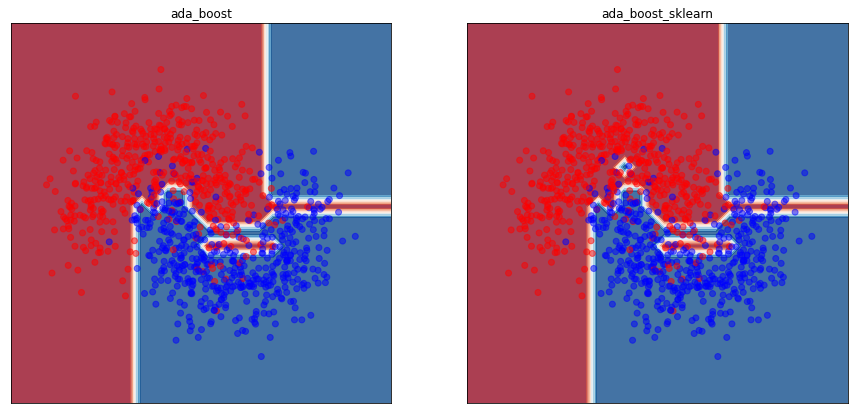

In [28]:
# test ensemble classifier
plt.figure(figsize=(15, 7))
for i, clf in enumerate(classifiers):
    prediction = clf.predict(X_test)

    # Put the result into a color plot
    ax = plt.subplot(1, len(classifiers), i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, alpha=0.5)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(names[i])

    print('accuracy {}: {}'.format(names[i], (prediction == y_test).sum() * 1. / len(y_test)))

## Task 8. Boosting, part 2. (1+1+1 points)

For adaboost we have computed each alpha according to the formula:

$$\alpha_t = \frac{1}{2}\log{\frac{1-N_T(h_T, w_T )}{N_T(h_T,w_t)}}$$

In the next task you will be asked to recompute all of the alphas on each iteration after adding another estimator to the composition of models, i.e. when the new classifier is fitted to the weighted data samples, the new alphas should be recomputed by directly minimizing the exponential loss, for all the available estimators. Take into account that at each step of the boosting algorithm **all** alphas and, consequently, **all** sample weights should be recomputed from scratch. 

**The task**:
* Complete the `recompute_alpha` and `recompute_distribution` functions
* Complete the `.fit` method of `RecomputeBoosting` class
* Complete the `.predict` method of `RecomputeBoosting` class
* Plot the final alphas (last calculated in case of recomputed alphas)
* plot the history scores of the resulting model at each iteration (use ```predict```, ```score``` and ```construct_alpha_history``` functions defined below) for both RecomputedBoosting and AdaBoost (it can be either your own implementation from Exercise 1.1 or the one from sklearn - in this case use ```.estimator_weights_```, ```.estimators_```)
* Make a conclusion about which method is better and in which case - in order to do that you can additionally vary the parameters of training: number and depth of the estimators, the noise of the data (moons)

**HINTS:**

In order to minimize the exponential loss with respect to alpha, use the [```scipy.optimize.minimize```](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) function.

When defining the function to minimize (in the case of AdaBoost it should be the exponential loss), have a look at the optimization problem formulation of Ridge Regression and at the regularization parameter (Lecture 2). Add it in order to guarantee the existence of the solution.

In [29]:
from scipy.optimize import minimize

### Subproblem 8.2.1. Recomputation of AdaBoost alphas and distribution (1 point)

Now let us define functions to recompute alphas and distributions for AdaBoost algorithm

In [30]:
def recompute_alpha(y, y_pred, C):
    """
    y_pred - is a list of predictions of the existing estimators
    C - is a reguralization term    
    """
    ### BEGIN Solution (do not delete this comment)
    #number of base clfs
    T = len(y_pred)

    y_pred = np.array(y_pred)
    
    loss = lambda x: np.sum(np.exp(-y* np.dot(y_pred.T, x))) + np.linalg.norm(x, ord = 2)**2 * C
    
    #initial point for optimization problem
    staring_point = np.zeros(T)
    alphas = minimize(loss, staring_point).x
    
    ### END Solution (do not delete this comment)

    return alphas
    

def recompute_distribution(y, y_pred, alphas):
    """
    y_pred - is a list of predictions of the existing estimators
    alphas - are the last recomputed alphas
    """

    ### BEGIN Solution (do not delete this comment)
    
    y_pred = np.array(y_pred)
    #calculation distribution
    distribution = np.exp(-y * np.dot(y_pred.T, alphas))

    #normalization
    distribution = distribution/np.sum(distribution)
    
    ### END Solution (do not delete this comment)

    return distribution

### Subproblem 8.2.2. Recomputed Boosting implementation (1 point)

Implement recomputation of Boosting algorithm. Then compare it with the `sklearn` implementation.

In [31]:
class RecomputedBoosting():
    """
    Generic class for construction of boosting models
    
    :param n_estimators: int, number of estimators (number of boosting rounds)
    :param base_classifier: callable, a function that creates a weak estimator. Weak estimator should support sample_weight argument
    :param get_alpha: callable, a function, that calculates new alpha given current distribution, prediction of the t-th base estimator,
                      boosting prediction at step (t-1) and actual labels
    :param get_distribution: callable, a function, that calculates samples weights given current distribution, prediction, alphas and actual labels
    """
    def __init__(self, n_estimators=50, base_classifier=None,
                 get_alpha=recompute_alpha, update_distribution=recompute_distribution, C=1.0):
        self.n_estimators = n_estimators
        self.base_classifier = base_classifier
        self.get_alpha = get_alpha
        self.update_distribution = update_distribution
        self.C = C
        
    def fit(self, X, y):
        n_samples = len(X)
        distribution = np.ones(n_samples, dtype=float) / n_samples
        self.classifiers = []
        
        #notice how alpha is a matrix - we will store the history of the updates here
        self.alphas = np.zeros((n_estimators, n_estimators))
        for i in range(self.n_estimators):
            # create a new classifier
            self.classifiers.append(self.base_classifier())        
            self.classifiers[-1].fit(X, y, sample_weight=distribution)
            
            
            ### BEGIN Solution (do not delete this comment)
            
            # create a list of predictions across all classifiers
            y_preds = []

            for id, clf in enumerate(self.classifiers):
                y_preds.append(clf.predict(X))
                    
            # recalculate alphas, add them to the matrix of self.alphas 
            # NOTE: here, self.alphas is a history of computed alphas at each step i
            current_alphas = recompute_alpha(y, y_preds, self.C)
            self.alphas[i, :i+1] = current_alphas

            # update distribution and normalize
            distribution = recompute_distribution(y, y_preds, current_alphas)
            ### END Solution (do not delete this comment)
    
    def predict(self, X):
        final_predictions = np.zeros(X.shape[0])
    
        ### BEGIN Solution (do not delete this comment)
        
        # get the weighted votes of the classifiers
        # do not forget that self.alphas is the whole history of recalculated alphas!
        out = 0
        n_clfs = len(self.classifiers) -1
        for id, clf in enumerate(self.classifiers):
            out += self.alphas[n_clfs,id] * clf.predict(X)
        
        out = np.sign(out)

        ### END Solution (do not delete this comment)
        
        return out

In [32]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost = RecomputedBoosting(n_estimators=n_estimators,
                     base_classifier=get_base_clf, get_alpha=recompute_alpha, 
                     update_distribution=recompute_distribution, C=1.0)
ada_boost.fit(X_train, y_train)

ada_boost_sklearn = AdaBoostClassifier(DecisionTreeClassifier(max_depth=max_depth),
                                       algorithm="SAMME",
                                       n_estimators=n_estimators)

ada_boost_sklearn.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=5,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                            

In [33]:
classifiers = [ada_boost, ada_boost_sklearn]
names = ['ada_boost', 'ada_boost_sklearn']

accuracy ada_boost: 0.91
accuracy ada_boost_sklearn: 0.875


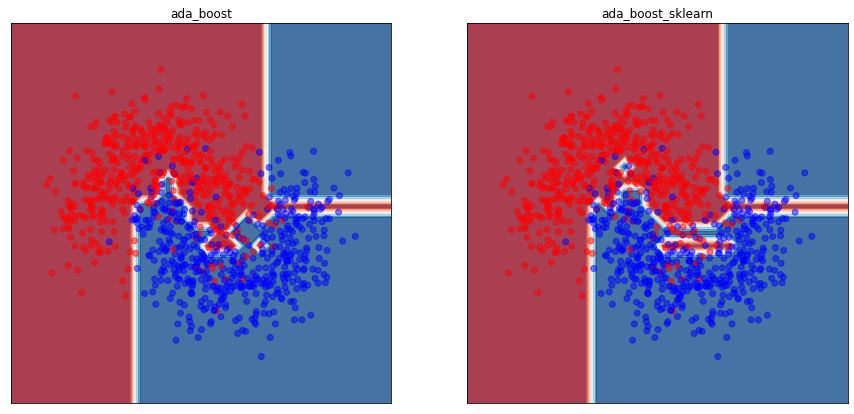

In [34]:
# test ensemble classifier
plt.figure(figsize=(15, 7))
for i, clf in enumerate(classifiers):
    prediction = clf.predict(X_test)

    # Put the result into a color plot
    ax = plt.subplot(1, len(classifiers), i + 1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

    # Plot also the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright, alpha=0.5)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(names[i])

    print('accuracy {}: {}'.format(names[i], (prediction == y_test).sum() * 1. / len(y_test)))

### Subproblem 8.2.3. Plotting the results (1 point)

- Plot the resulting alphas (last calculated in case of recomputed alphas)
- Plot the scores of the models at each iteration (each iteration - each estimator added to the ensemble) for AdaBoost and RecomputedAdaBoost

In [35]:
from sklearn.metrics import accuracy_score

def score(alphas, estimators, X, y):
    return accuracy_score(y, predict(alphas, estimators, X))

def predict(alphas, estimators, X, y=None):
    return np.sign(sum(
        b * e.predict(X) for b, e in zip(alphas, estimators)
    ))

def construct_alpha_history(init_alphas):
    """
    construct alpha history, alike recomputed alpha history, for AdaBoost algorithm
    """
    alphas = np.zeros((len(init_alphas), len(init_alphas)))
    for t, alpha in enumerate(init_alphas):
        alphas[t:, t] = alpha
    return alphas

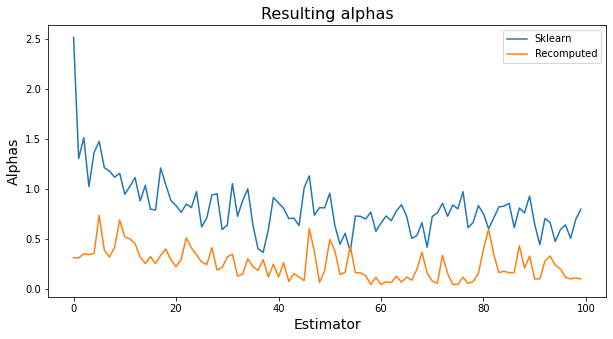

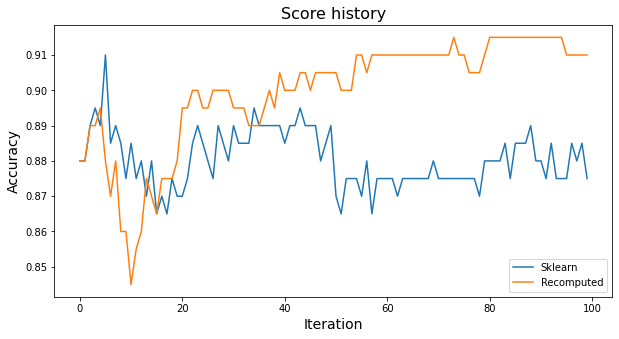

In [36]:
### BEGIN Solution (do not delete this comment)

plt.figure(figsize=(10,5))
plt.plot(ada_boost_sklearn.estimator_weights_, label = 'Sklearn')
plt.plot(ada_boost.alphas[-1,:], label ='Recomputed')
plt.title('Resulting alphas', fontsize = 16)
plt.xlabel('Estimator', fontsize = 14)
plt.ylabel('Alphas', fontsize = 14)
plt.legend()
plt.show();

sklearn_scores = []
for i in range(len(ada_boost1.alphas)):
    sklearn_scores.append(score(construct_alpha_history(ada_boost1.alphas)[i], ada_boost1.classifiers, X_test, y_test))

recomputed_scores = []
for i in range(len(ada_boost.alphas)):
    recomputed_scores.append(score(ada_boost.alphas[i], ada_boost.classifiers, X_test, y_test))

plt.figure(figsize=(10,5))
plt.plot(sklearn_scores, label = 'Sklearn')
plt.plot(recomputed_scores, label ='Recomputed')
plt.title('Score history', fontsize = 16)
plt.xlabel('Iteration', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.legend()
plt.show();

### END Solution (do not delete this comment)

Make a conclusion about which method is better and in which case.

**Your text answer (do not delete this comment)**:

\<Recomputed version of AdaBoost works more accurate with high number of iterations (20 and more)\>

## Task 9. Gradient Boosting and Feature Selection (1+1 points)

Gradient Boosting Machines (GBM) is a historical and logical continuation of the first boosting algorithms. In a way, one can consider AdaBoost as another variant of GBMs. These methods are extremely powerful tools, widely used in industry, research and various machine learning competitions. 

In this task we offer to focus on one variant of GBM called [XGBoost](https://github.com/dmlc/xgboost/tree/master/python-package). The dataset that is going to be used is  [Telecom Churn Dataset] (https://www.kaggle.com/becksddf/churn-in-telecoms-dataset).

Make sure that you have installed the XGBoost package before starting the task. 

In [37]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

data = pd.read_csv('data/telecom_churn.csv')
cols = ['account length','number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn']
data = data[cols]
data.iloc[:,-1] = pd.Categorical(data.iloc[:,-1])
data.iloc[:,-1] = data.iloc[:,-1].cat.codes
X, y = data.iloc[:,:-1], data.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,
                                                    random_state=0x0BADBEEF)

### Subproblem 9.1 (1 point)

 You will need to construct an XGBoost classification model, train it, plot the ROC curve, measure the training time and compare it to Random Forest. Afterward, compare the models' feature importances. 

* train the XGBoost classifier on the provided dataset
* measure the training time
* measure the average precision score on the test set
* plot ROC-curve
* repeat the previous steps for Random Forest classifier

**HINT**: use ```time.perf_counter()``` to measure time.

XGBClassifier training time:  0.256
RandomForestClassifier training time:  0.545
XGBClassifier average precision:  0.677
RandomForestClassifier average precision:  0.694


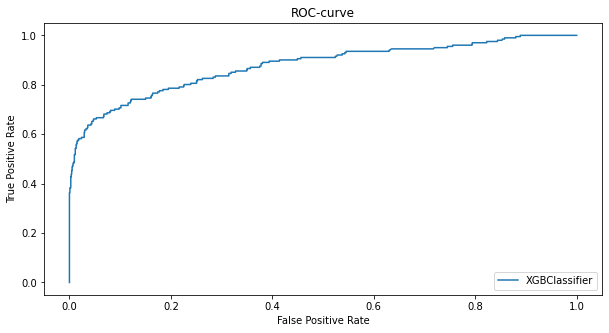

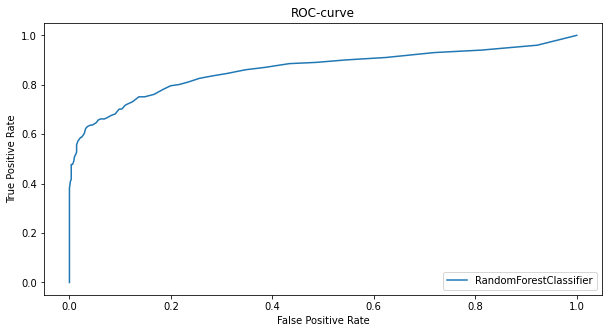

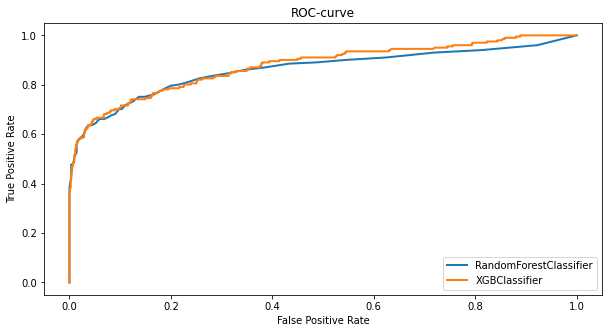

In [38]:
### BEGIN Solution (do not delete this comment)

from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
import time

random_seed = 0 

classifiers = [
             XGBClassifier(random_state = random_seed, n_jobs=-1),
             RandomForestClassifier(n_jobs=-1, random_state = random_seed)
]

times = []
TPRs = []
FPRs = []
precisions = []

for id, clf in enumerate(classifiers):
    
    #Measure time of fitting
    time_start = time.perf_counter()
    clf.fit(X_train, y_train)
    time_end = time.perf_counter()

    #predicting labels
    y_preds = clf.predict(X_test)
    #predicting probabilities
    y_preds_proba = clf.predict_proba(X_test)[:,1]

    #getting TPR, FPR for ROC
    #for ROC we use probbilities 
    FPR, TPR, _ = roc_curve(y_test, y_preds_proba)
    #Also getting precistion score 
    precision,_,_ = precision_recall_curve(y_test, y_preds)

    #adding results to list
    times.append(time_end-time_start)
    TPRs.append([TPR])
    FPRs.append([FPR])
    precisions.append([precision])

print('XGBClassifier training time: ', round(times[0],3))
print('RandomForestClassifier training time: ', round(times[1],3))

print('XGBClassifier average precision: ',np.round(np.mean(precisions[0]),3))
print('RandomForestClassifier average precision: ',np.round(np.mean(precisions[1]),3))

#XGBClassifier ROC
plt.figure(figsize=(10,5))
plt.title('ROC-curve')
plt.plot(np.array(FPRs[0]).T, np.array(TPRs[0]).T, label = 'XGBClassifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

#RandomForestClassifier ROC
plt.figure(figsize=(10,5))
plt.title('ROC-curve')
plt.plot(np.array(FPRs[1]).T, np.array(TPRs[1]).T, label = 'RandomForestClassifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

#Both
plt.figure(figsize=(10,5))
plt.title('ROC-curve')
plt.plot(np.array(FPRs[1]).T, np.array(TPRs[1]).T, label = 'RandomForestClassifier', linewidth = 2)
plt.plot(np.array(FPRs[0]).T, np.array(TPRs[0]).T, label = 'XGBClassifier', linewidth = 2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### END Solution (do not delete this comment)

* extract and compare the feature importances calculated by the previously trained XGBoost and Random Forest Classifiers. Are they different or the same, why?

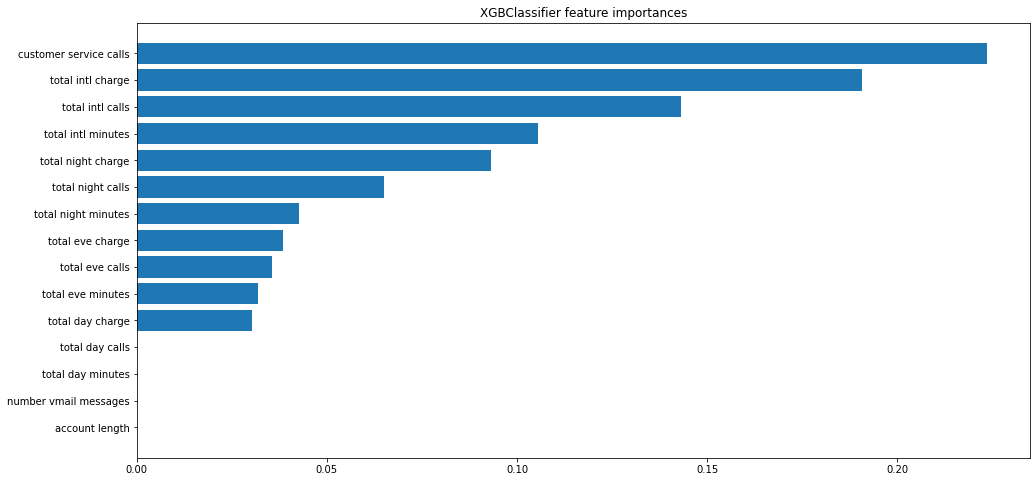

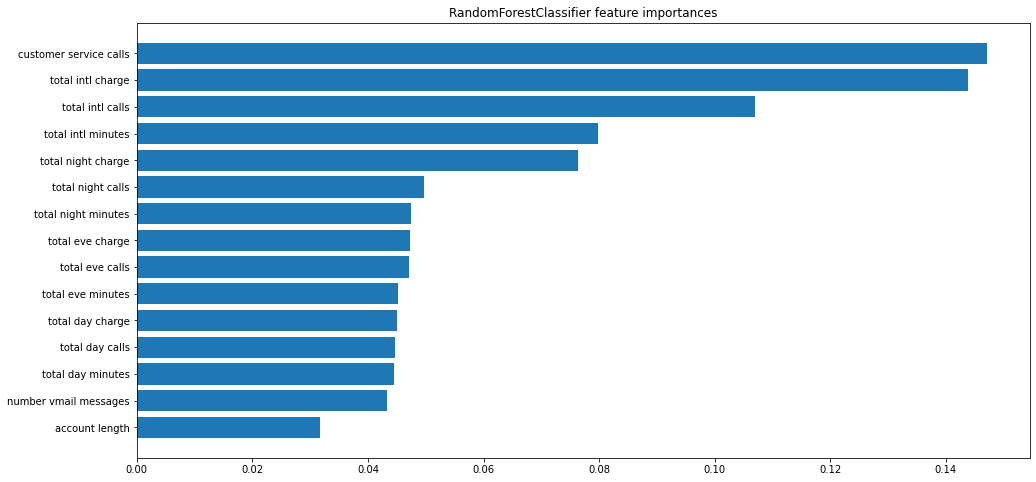

In [39]:
### BEGIN Solution (do not delete this comment)

import seaborn as sns
import pandas as pd

dframes = []

#addintional method for plotting correlation matrix
def plot_correlation(data, disp):
    if(type(data) != pd.DataFrame):
        data = pd.DataFrame(data)

    plt.figure(figsize=(16,13))
    sns.heatmap(data.corr(),cmap='vlag',linecolor='white',linewidths=1,annot=disp, vmax= 1, vmin=-1)
    plt.title("Correlation matrix");
    plt.tight_layout()
    plt.plot()

feature_names = [X.columns]


for id, clf in enumerate(classifiers):
    #importances.append([clf.feature_importances_])
    importances = np.array(clf.feature_importances_)
    
    #adding dato to DataFrame table
    frame = pd.DataFrame(data = importances, index = feature_names)

    #sorting
    frame = frame.sort_values(by =[0], ascending = True)

    dframes.append(frame)

    fig, ax = plt.subplots(figsize=(16, 8))
    ax.barh(feature_names[0].values, frame[0])
    ax.title.set_text(str(type(clf).__name__)+' feature importances')
    plt.plot()

#__________Uncomment this line to plot correlation matrix_______ 
#plot_correlation(X_train, True)   

### END Solution (do not delete this comment)

**Your text answer (do not delete this comment)**:

\<Future importances are different for both classifiers. It's ineresting, but I plotted correnation matrix and found out that all features which has 0 feature importances in case of XGBClassifier are fully correlated. So, I think it means that these features dont affect the gradient during solving minimization problem. So that's why feature importances are different - because XGBClassifier uses gradient for optimisation.  \>

### Subproblem 9.2 (1 point)

* For each model separately (XGBoost classifier and Random Forest classifier) perform the following steps:
    1. define the subset of features (in the beginning the subset contains all features)
    2. fit the model using the subset of features
    3. remove the least important feature from the subset (use the importances received in subproblem 9.1)
    4. repeat steps 2 and 3 until no features are left in the subset
    5. make a plot showing how the average precision changes depending on the size of the subset of the most important features


**HINT**: you can use ```sklearn.feature_selection.SelectFromModel``` and its ```.transform``` methods to get the new $X$,$y$ subsets

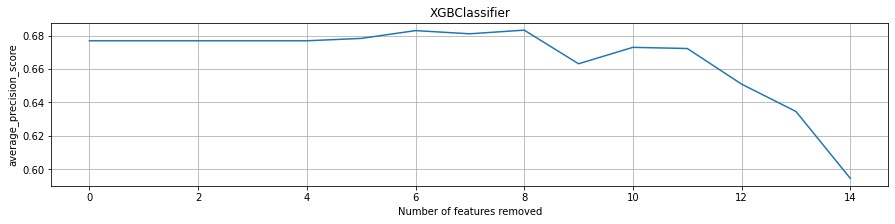

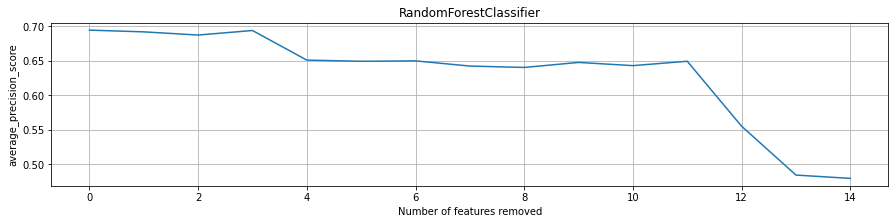

In [40]:
### BEGIN Solution (do not delete this comment)
import copy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0x0BADBEEF)


def feature_selection(model, df, X_train, X_test):
    precisions = []

    #need transfer data, not link to varialbe
    X_Train = copy.deepcopy(X_train)
    X_Test = copy.deepcopy(X_test)

    #for all 15 features
    for feature in range(15):
        #creating new clf
        clf = model
        #training
        clf.fit(X_Train, y_train)
        y_preds = clf.predict(X_Test)
        precision, _, _ = precision_recall_curve(y_test, y_preds)
        
        precisions.append(np.mean(precision))

        waste_feature = df.index[feature] 
        
        del X_Train[waste_feature[0]]
        del X_Test[waste_feature[0]]
    
    return precisions

xgb_prec = feature_selection(XGBClassifier(random_state=random_seed, n_jobs=-1), dframes[0], X_train, X_test)

plt.figure(figsize=(15, 3))
plt.title("XGBClassifier")
plt.plot(xgb_prec)
plt.xlabel("Number of features removed")
plt.ylabel("average_precision_score")
plt.grid()
plt.show()

rf_prec = feature_selection(RandomForestClassifier(random_state = random_seed, n_jobs=-1), dframes[1], X_train, X_test)

plt.figure(figsize=(15, 3))
plt.title("RandomForestClassifier")
plt.plot(rf_prec)
plt.xlabel("Number of features removed")
plt.ylabel("average_precision_score")
plt.grid()
plt.show()

### END Solution (do not delete this comment)

# Task 10. Stacking (2 point)

Stacking is another approach to combine several algorithms to get better results. Basically stacking is an ensemble learning technique that combines multiple classification or regression models via a meta-classifier or a meta-regressor. The main concept is to learn base models on some set of features then train meta-model, which uses the predictions of base models as features. This technique is widely used in multiple real case scenarios to get better results. One of the main problems of stacking is, of course, overfitting. To avoid it, the training set is divided into $ n $ folds, $ (n-1) $ of which are used for training the base models, and $ n $ -th for the overall prediction (calculating the meta-factor). In order to train the meta-model, it should receive predictions from the base models for those objects of the training sample on which the meta-model will be trained. 

There are various of stacking approaches$.^{[1]}$ For example, in order, to obtain meta-factors for test data, the base classifiers can be trained on the entire training set, since the problem of overfitting does not arise here. In other words, if we want to calculate the factors for the test set, we can safely use the training set to train the base classifiers. If we want to calculate factors for the training set, then it is necessary to ensure that the classifier does not predict for those objects on which it has been trained$.^{[2]}$ You can read more details about stacking [blockpost](https://blog.statsbot.co/ensemble-learning-d1dcd548e936), [kaggle ensemble guide](https://mlwave.com/kaggle-ensembling-guide/).

P.s. Stacking and Blending are two similar approaches to combining classifiers (ensembling). The difference is that Stacking uses out-of-fold predictions for the train set, and Blending uses a validation set to train the next layer [source](quora.com/What-are-examples-of-blending-and-stacking-in-Machine-Learning). Because they are so similar you can use any of them. 

[1] http://www.machinelearning.ru/wiki/images/5/56/Guschin2015Stacking.pdf  
[2] MLgroup SHAD

**The task:**

* Choose 6 different base models(base models can be any models that you know, and can differ between each other by different hyperparameters, models of ml,features e.t.c) and train them.
* Report individual scores on test set for each of the models. As a score use accuracy.
* Complete the ```meta_classfier``` function
* Train meta-classifier on original datasets features, report score on the test.
* Train meta-classifier on those base models. Report the test score (accuracy) in this case.
* Does stacking helped to gain a better score?

Enough of theory, let's get back to Practice. Download dataset fetch_covertype from [sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html#sklearn.datasets.fetch_covtype) and  split it train-test - 60/40.
More detail about this dataset you can find [here](https://archive.ics.uci.edu/ml/datasets/Covertype)

**Note**: To save your time, use only part of the dataset to debug your solution.

In [41]:
import sklearn
fc = sklearn.datasets.fetch_covtype()

X_train, X_test, y_train, y_test = train_test_split(fc['data'], fc['target'], test_size=0.4)

### Subproblem 10.1. Base models (1 point)

Chose 6 different base models (base models can be any models that you know, and can differ with each other by different hyperparameters,  models of ml, features e.t.c) and train them. 

In [42]:
### BEGIN Solution (do not delete this comment)
from tqdm.notebook import trange, tqdm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestCentroid
from sklearn.ensemble import ExtraTreesClassifier

classifiers = [
               RandomForestClassifier(n_estimators=25, max_depth=10, n_jobs=-1, random_state=random_seed),
               ExtraTreesClassifier(n_estimators = 50,max_depth = 3 ),
               #LogisticRegression(max_iter=1000, C=2),
               DecisionTreeClassifier(random_state= random_seed),
               GaussianNB(),
               MLPClassifier(hidden_layer_sizes = 7, learning_rate='adaptive', learning_rate_init= 0.01 , max_iter=40, random_state= random_seed),
               KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
]

for _, clf in enumerate(tqdm(classifiers)):
    clf.fit(X_train, y_train)

### END Solution (do not delete this comment)

Report individual scores on the test set. As a score use accuracy.

In [43]:
### BEGIN Solution (do not delete this comment)
from sklearn.metrics import accuracy_score

names = []
scores = []

for id, clf in enumerate(tqdm(classifiers)):
    y_pred = clf.predict(X_test)

    scores.append(accuracy_score(y_test, y_pred))
    names.append(str(type(clf).__name__))


pd.DataFrame(data= {'Accuracy on test set': scores}, index=names)

### END Solution (do not delete this comment)

,Accuracy on test set
RandomForestClassifier,0.745995
ExtraTreesClassifier,0.579630
DecisionTreeClassifier,0.930393
GaussianNB,0.459771
MLPClassifier,0.582617
KNeighborsClassifier,0.962187


### Subproblem 10.2. Meta classifier (1 point)

Write meta-classifier function.

In [44]:
def meta_classifier(base_clfs, final_classifier, X_train, X_test, y_train, cv):
    """
    Meta classifier prediction using stacking. 
    Input:
    :param base_clfs: list,  base classifiers which will be stacked together.
    :param final_classifier: estimator, a classifier which will be used to combine the base estimators. 
    :param X_train: numpy array or pandas table, train set.
    :param X_test: numpy array or pandas table, target for train set.
    :param X_train: numpy array or pandas table, test set.
    
    Output:
    :param y_pred: numpy array or pandas table, prediction of meta classifier using stacking on test set.
    :param final_classifier(optional): estimator, trained final_calssifier.
    
    
    More details https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html
    
    """
    ### BEGIN Solution (do not delete this comment)
    
    #If no base classifiers
    if base_clfs == None:
        #train meta classifier and make prediction
        final_classifier.fit(X_train, y_train)
        y_preds = final_classifier.predict(X_test)

        return y_preds, final_classifier

    #If we have base classifiers
    else:
        train_preds=[]
        test_preds = []

        #train every base classifier 
        for _,base_clf in enumerate(tqdm(base_clfs)):
            clf = GridSearchCV(base_clf, param_grid={},  scoring='accuracy', n_jobs=-1 , cv = cv, refit= True)
            clf.fit(X_train, y_train)
            #make pridition with train and test data
            y_train_preds = clf.predict(X_train)
            y_test_preds = clf.predict(X_test)

            #adding data to list
            train_preds.append(y_train_preds)
            test_preds.append(y_test_preds)

        #join all parts of dataset
        X_train_meta = np.stack(train_preds, axis = 1)
        X_test_meta = np.stack(test_preds, axis = 1)

        #train and make prediction
        final_classifier.fit(X_train_meta, y_train)
        y_preds = final_classifier.predict(X_test_meta)

        return y_preds, final_classifier
    ### END Solution (do not delete this comment)

Train meta-classifier on original datasets features. And report score on the test.

In [45]:
### BEGIN Solution (do not delete this comment)

y_preds, _ = meta_classifier(None, LogisticRegression( random_state=random_seed), X_train, X_test, y_train, cv =5 )
score = accuracy_score(y_test, y_preds)
print('meta_classifier accuracy on test set: ', score)

### END Solution (do not delete this comment)

meta_classifier accuracy on test set:  0.6192293625352294


Train meta-classifier on those base models. Report the test score (accuracy) in this case.

In [46]:
### BEGIN Solution (do not delete this comment)

y_preds,_ = meta_classifier(classifiers, LogisticRegression(random_state=random_seed), X_train, X_test, y_train, cv= 5)
score = accuracy_score(y_test, y_preds)
print('meta_classifier accuracy on test set:  ', score )

### END Solution (do not delete this comment)


meta_classifier accuracy on test set:   0.9256040102407436


Does stacking helped to gain better score?

**Your text answer (do not delete this comment)**:

\<Stacking helped to gain better score for meta classifier, but not better as individual classes it had before. It's because base classifiers are quite strong here. For meta classifier with weak base ones results might be better than for each one . Also it tooks very much time for training...   \>